In [1]:
%autosave 0

Autosave disabled


Simulation lesson! Let's simulate probability problems using numpy!

We set a random seed because all numbers generated by a computer are pseudo-random.  
The notebook will be reproducible if we keep the seed consistent throughout.  
This will be an important concept when we get to splitting data for data science projects.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

There are many ways to generate random numbers with numpy!

- .choice() chooses from a list of possible values
- .integers() gives integers from a low to high range
- .random() gives random floats from 0 to 1
- .normal() allows us to define a normal distribution and sample from it

Our syntax will differ slightly from the curriculum. [Let's see](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) why.

In [3]:
rng = np.random.default_rng(seed = 42) # create a rand num generator

In [4]:
rng.choice([1, 3, 5, 7, 9], (10, 2))


array([[1, 7],
       [7, 5],
       [5, 9],
       [1, 7],
       [3, 1],
       [5, 9],
       [7, 7],
       [7, 7],
       [5, 1],
       [9, 5]])

Let's start simulating some scenarios.

In [5]:
rng.integers(1, 11, (10, 2)) #was uniform

array([[ 6,  4],
       [ 2, 10],
       [ 8,  7],
       [ 5,  9],
       [ 6,  5],
       [ 5,  3],
       [ 1,  6],
       [ 9,  1],
       [ 9,  9],
       [ 3,  7]])

In [6]:
rng.random((10,2)) 

array([[0.75808774, 0.35452597],
       [0.97069802, 0.89312112],
       [0.7783835 , 0.19463871],
       [0.466721  , 0.04380377],
       [0.15428949, 0.68304895],
       [0.74476216, 0.96750973],
       [0.32582536, 0.37045971],
       [0.46955581, 0.18947136],
       [0.12992151, 0.47570493],
       [0.22690935, 0.66981399]])

In [7]:
rng.normal(0, 1, (10, 2)) #define a mean, std, and return col.rows (sampling from it)

array([[ 0.74325417,  0.54315427],
       [-0.66550971,  0.23216132],
       [ 0.11668581,  0.2186886 ],
       [ 0.87142878,  0.22359555],
       [ 0.67891356,  0.06757907],
       [ 0.2891194 ,  0.63128823],
       [-1.45715582, -0.31967122],
       [-0.47037265, -0.63887785],
       [-0.27514225,  1.49494131],
       [-0.86583112,  0.96827835]])

Coin flips!
Let's determine the likelihood of getting 3 out 3 heads!

In [8]:
#0 is tails, 1 is heads
flips = rng.choice([0, 1], (10_000, 3))
flips[:5]

array([[1, 1, 0],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 0],
       [1, 0, 0]])

Expecting to see a 0.125 probability of this happening!

In [9]:
flips_sum = flips.sum(axis = 1)
flips_sum[:5]

array([2, 3, 2, 2, 1])

In [10]:
flips_sum == 3 # returns boolean values -- True = 1 and False = 0

array([False,  True, False, ...,  True, False, False])

In [11]:
(flips_sum == 3).sum()

1256

In [12]:
wins = (flips_sum == 3).sum() # divide wins by the total number of trials
wins / len(flips_sum)

0.1256

This is close to our expected result!




On any given class day, there is a 10% chance that Adam forgets to take attendance.
Assuming all weeks have 5 class days, what is the probability he forgets AT LEAST once in a week?

In [13]:
weeks = rng.random((1_000, 5))
weeks[:5]

array([[0.54477616, 0.17646386, 0.50305563, 0.64578418, 0.82822198],
       [0.81217673, 0.04924149, 0.45352499, 0.02056906, 0.88815612],
       [0.17390608, 0.6248747 , 0.57061837, 0.62552943, 0.56341662],
       [0.71558868, 0.62610997, 0.09030025, 0.36676795, 0.54659344],
       [0.32519743, 0.76033088, 0.31789772, 0.82868417, 0.14673372]])

In [14]:
weeks <= 0.1

array([[False, False, False, False, False],
       [False,  True, False,  True, False],
       [False, False, False, False, False],
       ...,
       [False, False, False, False, False],
       [False,  True, False,  True, False],
       [False, False, False, False,  True]])

In [15]:
(weeks <= 0.1).sum(axis = 1)


array([0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0,
       1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 1, 1,

In [16]:
did_forget = (weeks <= 0.1).sum(axis = 1)
did_forget[:5]

array([0, 2, 0, 1, 0])

In [17]:
did_forget != 0

array([False,  True, False,  True, False, False, False, False,  True,
       False,  True, False, False,  True,  True, False,  True,  True,
       False, False, False, False,  True,  True,  True,  True, False,
        True, False, False, False,  True, False, False,  True, False,
        True, False,  True, False,  True,  True,  True, False, False,
        True, False,  True, False, False, False,  True,  True, False,
        True, False, False, False,  True, False, False,  True, False,
        True, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False,  True,  True, False, False, False,
        True, False,  True, False,  True, False,  True,  True, False,
        True, False,  True, False,  True, False, False,  True,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
       False,  True,

In [18]:
Three = (did_forget == 3).sum()
Three

4

In [19]:
total_forgot = (did_forget != 0).sum()

In [20]:
total_forgot

435

In [21]:
total_forgot / len(did_forget)

0.435

(array([565.,   0.,   0., 367.,   0.,   0.,  64.,   0.,   0.,   4.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

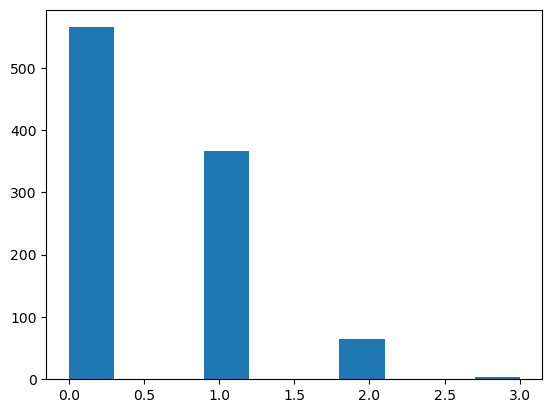

In [22]:
plt.hist(did_forget)

Web dev studens, on average, complete 5 projects, with a standard deviation of 2, 

Data Science students, on average, complete 8 projects with a standard deviation of 1.

Whats the likelihood that webdev student completes as many OR MORE projects than a data science student?

In [23]:
wd_projects = rng.normal(5, 2, 1_000)
ds_projects = rng.normal(8, 1, 1_000)

In [24]:
num_higher = (wd_projects >= ds_projects).sum()
num_higher

124

In [25]:
num_higher / len(ds_projects)

0.124